A magnetically coupled rotors with velocity dependent damping move according to the equations
\begin{equation}
    \ddot{\theta}_{1} = \beta \ \text{sin} (\theta_2 - \theta_1) - b \dot{\theta}^{2}_1 \\
    \ddot{\theta}_{2} = \beta \ \text{sin} (\theta_1 - \theta_2) - b \dot{\theta}^{2}_2
\end{equation}

Write a program that plots $\theta_1$ and $\theta_2$ vs. time for total time $t=20$ seconds, with $b = 0.1$ and $\beta = 5.0$. 

Here we performed a slight modification to the damping term which now depends on $\dot{\theta}^{2}$ instead that on $\dot{\theta}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Making it a first order differential equation
\begin{equation}
    \dot{\theta}_{1} = \omega_1 \\
    \dot{\omega}_{1} = \beta \ \text{sin} (\theta_2 - \theta_1) - b \omega_1 * |\omega_1| \\
    \dot{\theta}_{2} = \omega_2 \\
    \dot{\omega}_{2} = \beta \ \text{sin} (\theta_1 - \theta_2) - b \omega_2  * |\omega_2|
\end{equation}

Collecting
\begin{equation}
    y_1 = 
    \begin{pmatrix}
        \theta_1 \\
        \omega_1
    \end{pmatrix}
\end{equation}
\begin{equation}
    \dot{y}_1 = 
    \begin{pmatrix}
        \omega_1 \\
        \beta \ \text{sin} (\theta_2 - \theta_1) - b \omega_1  * |\omega_1|
    \end{pmatrix}
\end{equation}

\begin{equation}
    y_2 = 
    \begin{pmatrix}
        \theta_2 \\
        \omega_2
    \end{pmatrix}
\end{equation}
\begin{equation}
    \dot{y}_2 = 
    \begin{pmatrix}
        \omega_2 \\
        \beta \ \text{sin} (\theta_1 - \theta_2) - b \omega_2 * |\omega_2|
    \end{pmatrix}
\end{equation}

\begin{equation}
y = 
    \begin{pmatrix}
        \theta_1 \\
        \omega_1 \\
        \theta_2 \\
        \omega_2
    \end{pmatrix}
\end{equation}

\begin{equation}
    \dot{y} = 
    \begin{pmatrix}
        \omega_1 \\
        \beta \ \text{sin} (\theta_2 - \theta_1) - b \omega_1 * |\omega_1| \\
        \omega_2 \\
        \beta \ \text{sin} (\theta_1 - \theta_2) - b \omega_2  * |\omega_2|
    \end{pmatrix}
\end{equation}

Note that $\omega * |\omega|$ was used instead of $\omega^2$ since the damping should always oppose motion. Using $\omega^2$ the damping term would always be positive and point in the same direction while with $\omega * |\omega|$ we get a positive value when $\omega > 0$ and a negative value when $\omega < 0$.

In [2]:
def deriv(y, time, beta = 5.0, b = 0.1):
    return np.array([y[1], beta*(y[2] - y[0]) - b*y[1]*abs(y[1]), y[3],  beta*(y[0] - y[2]) - b*y[3]*abs(y[3])])

In [3]:
def rk4(y, time, beta, b, dt):
    for i in range(len(time)-1):
        k1 = deriv(y[i][:], time[i], beta, b) * dt
        k2 = deriv(y[i][:] + k1/2, time[i] + dt/2, beta, b) * dt
        k3 = deriv(y[i][:] + k2/2, time[i] + dt/2, beta, b) * dt
        k4 = deriv(y[i][:] + k3, time[i], beta, b) * dt
        y[i+1][:] = y[i][:] + (k1 + 2*k2 + 2*k3 + k4)/6
    #return y

In [20]:
b = 1  #increased to make the damping effect more visible
beta = 5

t0 = 0
tf = 20
dt = 0.1
N = int((tf - t0)/dt)

y = np.zeros([N,4])
y_dot = np.zeros([N,4])
#y2 = np.zeros([N,2])

y[0][0] = 1
#y[0][2] = 1

time = np.linspace(t0, tf, N)

In [21]:
rk4(y, time, beta, b, dt)

In [22]:
theta1 = np.transpose(y)[0][:]
theta2 = np.transpose(y)[2][:]
#theta1

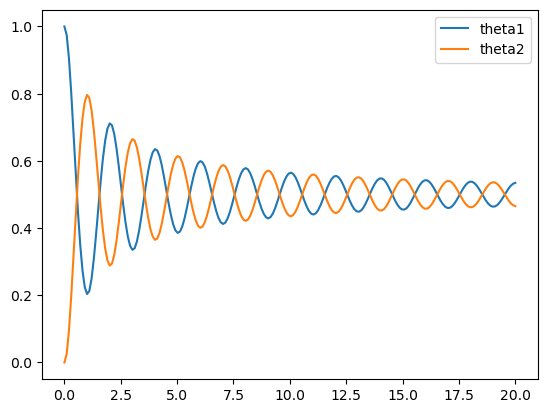

In [23]:
plt.figure()
plt.plot(time, theta1, label= 'theta1')
plt.plot(time, theta2, label= 'theta2')
plt.legend()
plt.show()

In [8]:
def deriv2(time, y, beta = 5.0, b = 1):
    theta1, omega1, theta2, omega2 = y
    dtheta1 = omega1
    domega1 = beta*np.sin(theta2-theta1) - b*omega1 * abs(omega1)
    dtheta2 = omega2
    domega2 = beta*np.sin(theta1-theta2) - b*omega2 * abs(omega1)
    return [dtheta1, domega1, dtheta2, domega2]

In [9]:
sol = solve_ivp(deriv2, t_span = (t0,tf), y0 = [1.0, 0.0, 0.0, 0.0], t_eval = time, method = 'RK45')

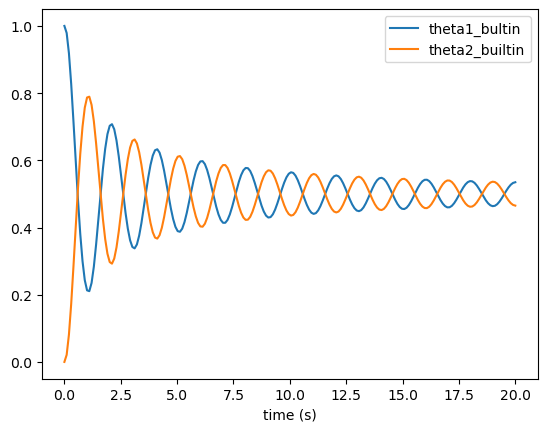

In [25]:
plt.figure()
plt.plot(sol.t, sol.y[0], label = 'theta1_bultin')
plt.plot(sol.t, sol.y[2], label= 'theta2_builtin')
plt.xlabel('time (s)')
plt.legend()
plt.show()

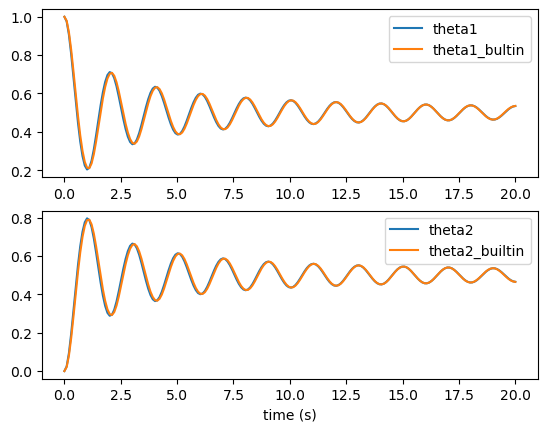

In [29]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(time, theta1, label= 'theta1')
ax1.plot(sol.t, sol.y[0], label = 'theta1_bultin')
ax1.legend()

ax2.plot(time, theta2, label= 'theta2')
ax2.plot(sol.t, sol.y[2], label= 'theta2_builtin')
plt.xlabel('time (s)')
ax2.legend()
plt.show()